# Unleashing the Power of Ensemble Learning for Enhancing Credit Risk Predictive Accuracy
##### by Lana Fuadi

### 

### IMPORT LIBRARY

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import datetime

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Machine Learning
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import scipy
from scipy import stats
from scipy.stats import skew
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, auc, roc_auc_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, cross_val_score

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')


### LOAD DATASET

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
dataku     = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)

In [66]:
dataku.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
dataku.tail(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


### FEATURES DEFINITION

In [68]:
features_definition = pd.read_excel('LCDataDictionary.xlsx')

In [69]:
features_definition.sample(5)

,Unnamed: 0,Description,Unnamed: 2
93,NaN,NaN,NaN
19,grade,LC assigned loan grade,LC menugaskan nilai pinjaman
45,open_acc,The number of open credit lines in the borrowe...,Jumlah jalur kredit terbuka dalam file kredit ...
40,mths_since_last_delinq,The number of months since the borrower's last...,Jumlah bulan sejak kenakalan terakhir peminjam.
80,NaN,NaN,NaN


## 1. EXPLORATORY DATA ANALYSIS

In [56]:
num        = dataku.select_dtypes(exclude='object')
cat        = dataku.select_dtypes(include='object')
target     = dataku[['loan_status']]
num_column = num.columns
cat_column = cat.columns

In [82]:
datas = dataku.copy()

In [94]:
print('Our dataset has', datas.shape[0], 'rows and', datas.shape[1], 'columns.')

Our dataset has 466285 rows and 43 columns.


### 1.1. Check n Unique and Data Type

In [84]:
datas_type = pd.DataFrame({'nunique': datas.nunique(), 'data type': datas.dtypes})
datas_type

,nunique,data type
Unnamed: 0,466285,int64
id,466285,int64
member_id,466285,int64
loan_amnt,1352,int64
funded_amnt,1354,int64
funded_amnt_inv,9854,float64
term,2,object
int_rate,506,float64
installment,55622,float64
grade,7,object


### 1.2. Check Missing Value and its Percentage

In [95]:
print('There are', datas.isnull().sum().sum(), 'missing values')

There are 460160 missing values


In [85]:
missing_datas = pd.DataFrame({'Missing Values': datas.isnull().sum(), 'Missing Percentage': (datas.isnull().mean() * 100)})
missing_datas = missing_datas.sort_values(by='Missing Values', ascending=False)
missing_datas.head(45)

,Missing Values,Missing Percentage
inq_last_12m,466285,100.000000
total_bal_il,466285,100.000000
dti_joint,466285,100.000000
verification_status_joint,466285,100.000000
annual_inc_joint,466285,100.000000
open_acc_6m,466285,100.000000
open_il_6m,466285,100.000000
open_il_12m,466285,100.000000
open_il_24m,466285,100.000000
mths_since_rcnt_il,466285,100.000000


#### Drop Unimportant Features

In [ ]:
datas = datas.dropna(how='all', axis=1) # drop all columns without value 

In [62]:
dataku[['application_type']].value_counts()

application_type
INDIVIDUAL          466285
Name: count, dtype: int64

In [63]:
dataku[['policy_code']].value_counts()

policy_code
1              466285
Name: count, dtype: int64

In [64]:
dataku[['pymnt_plan']].value_counts()

pymnt_plan
n             466276
y                  9
Name: count, dtype: int64

In [ ]:
# drop unimportant features
# unimportant features because it has too many unique : Unnamed, id, emp_title, url
# unimportant features because it has only one unique : application type, policy_code
# unimportant features because it has severe imbalance value : pymnt_plan
datas = datas.drop(['Unnamed: 0', 'id', 'member_id', 'sub_grade', 'emp_title', 'pymnt_plan', 'url', 'title', 'addr_state', 'policy_code', 'application_type'], axis=1)

In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = datas.isnull().sum() / len(datas) * 100

# Create a list of columns to drop based on the threshold
columns_to_drop = missing_percentage[missing_percentage > 50].index # we drop features that has more than 50 percent missing value

# Drop the columns from the dataframe
datas = datas.drop(columns_to_drop, axis=1)

# we do this because we want to avoid bias caused by imputing too many missing value

### 1.3. Check Duplicated Value

In [96]:
print('There are', datas.duplicated().sum(), 'duplicated value')

There are 0 duplicated value


### 1.4. Statistical Exploration

In [89]:
num        = datas.select_dtypes(exclude='object')
cat        = datas.select_dtypes(include='object')
target     = datas[['loan_status']]
num_column = num.columns
cat_column = cat.columns

#### 1.4.1. Numerical Feature

In [90]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt,466285.0,14291.801044,8274.371300,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt_inv,466285.0,14222.329888,8297.637788,0.00,8000.000000,12000.000000,19950.00000,3.500000e+04
int_rate,466285.0,13.829236,4.357587,5.42,10.990000,13.660000,16.49000,2.606000e+01
installment,466285.0,432.061201,243.485550,15.67,256.690000,379.890000,566.58000,1.409990e+03
annual_inc,466281.0,73277.381470,54963.568654,1896.00,45000.000000,63000.000000,88960.00000,7.500000e+06
dti,466285.0,17.218758,7.851121,0.00,11.360000,16.870000,22.78000,3.999000e+01
delinq_2yrs,466256.0,0.284678,0.797365,0.00,0.000000,0.000000,0.00000,2.900000e+01
inq_last_6mths,466256.0,0.804745,1.091598,0.00,0.000000,0.000000,1.00000,3.300000e+01
open_acc,466256.0,11.187069,4.987526,0.00,8.000000,10.000000,14.00000,8.400000e+01


#### 1.4.2. Categorical Feature

In [97]:
cat.describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
purpose,466285,14,debt_consolidation,274195
zip_code,466285,888,945xx,5304
earliest_cr_line,466256,664,Oct-00,3674


#### 1.4.3. Target Feature

In [98]:
target.describe().T

,count,unique,top,freq
loan_status,466285,9,Current,224226


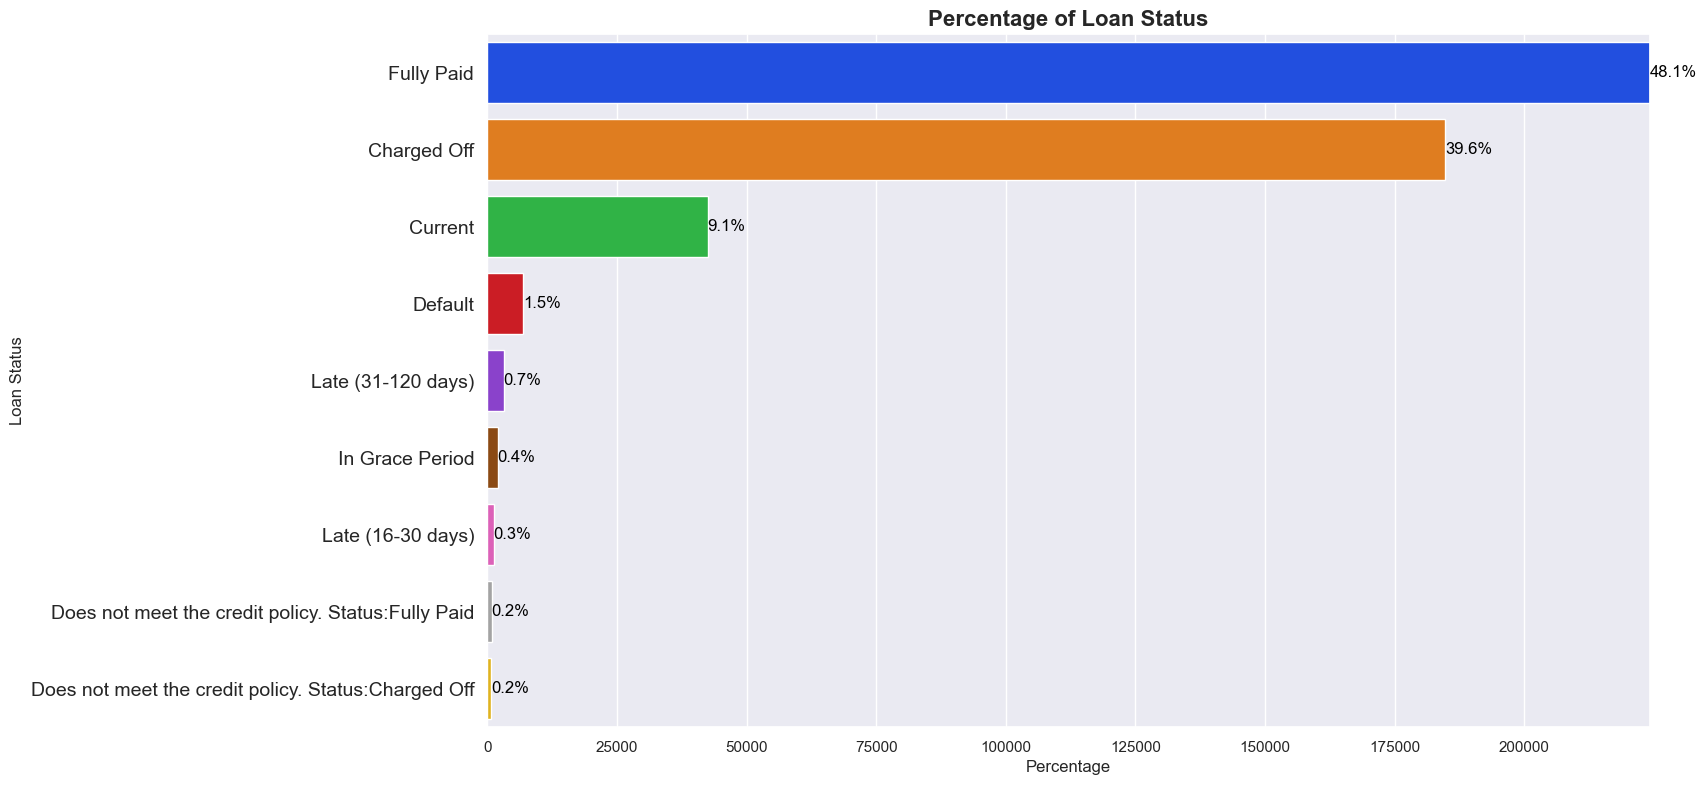

In [109]:
sns.set(style='darkgrid', palette='bright')
fig, ax = plt.subplots(figsize=(15, 9))
sns.countplot(y='loan_status', data=datas, ax=ax, order=datas['loan_status'].value_counts().index)

total = float(len(datas['loan_status']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_width() + 10
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='left', va='center', fontsize=12, color='black')

ax.set_title('Percentage of Loan Status', fontsize=16, fontweight='bold')
ax.set_xlim(0, datas['loan_status'].value_counts().max() + 10)
ax.set_xlabel('Percentage')
ax.set_ylabel('Loan Status')
ax.set_yticklabels(datas['loan_status'].unique(), fontsize=14)

plt.show()


### 1.5. Data Visualization

In [110]:
num        = datas.select_dtypes(exclude='object')
cat        = datas.select_dtypes(include='object')
target     = datas[['loan_status']]
num_column = num.columns
cat_column = cat.columns

#### 1.5.1. Univariate Analysis

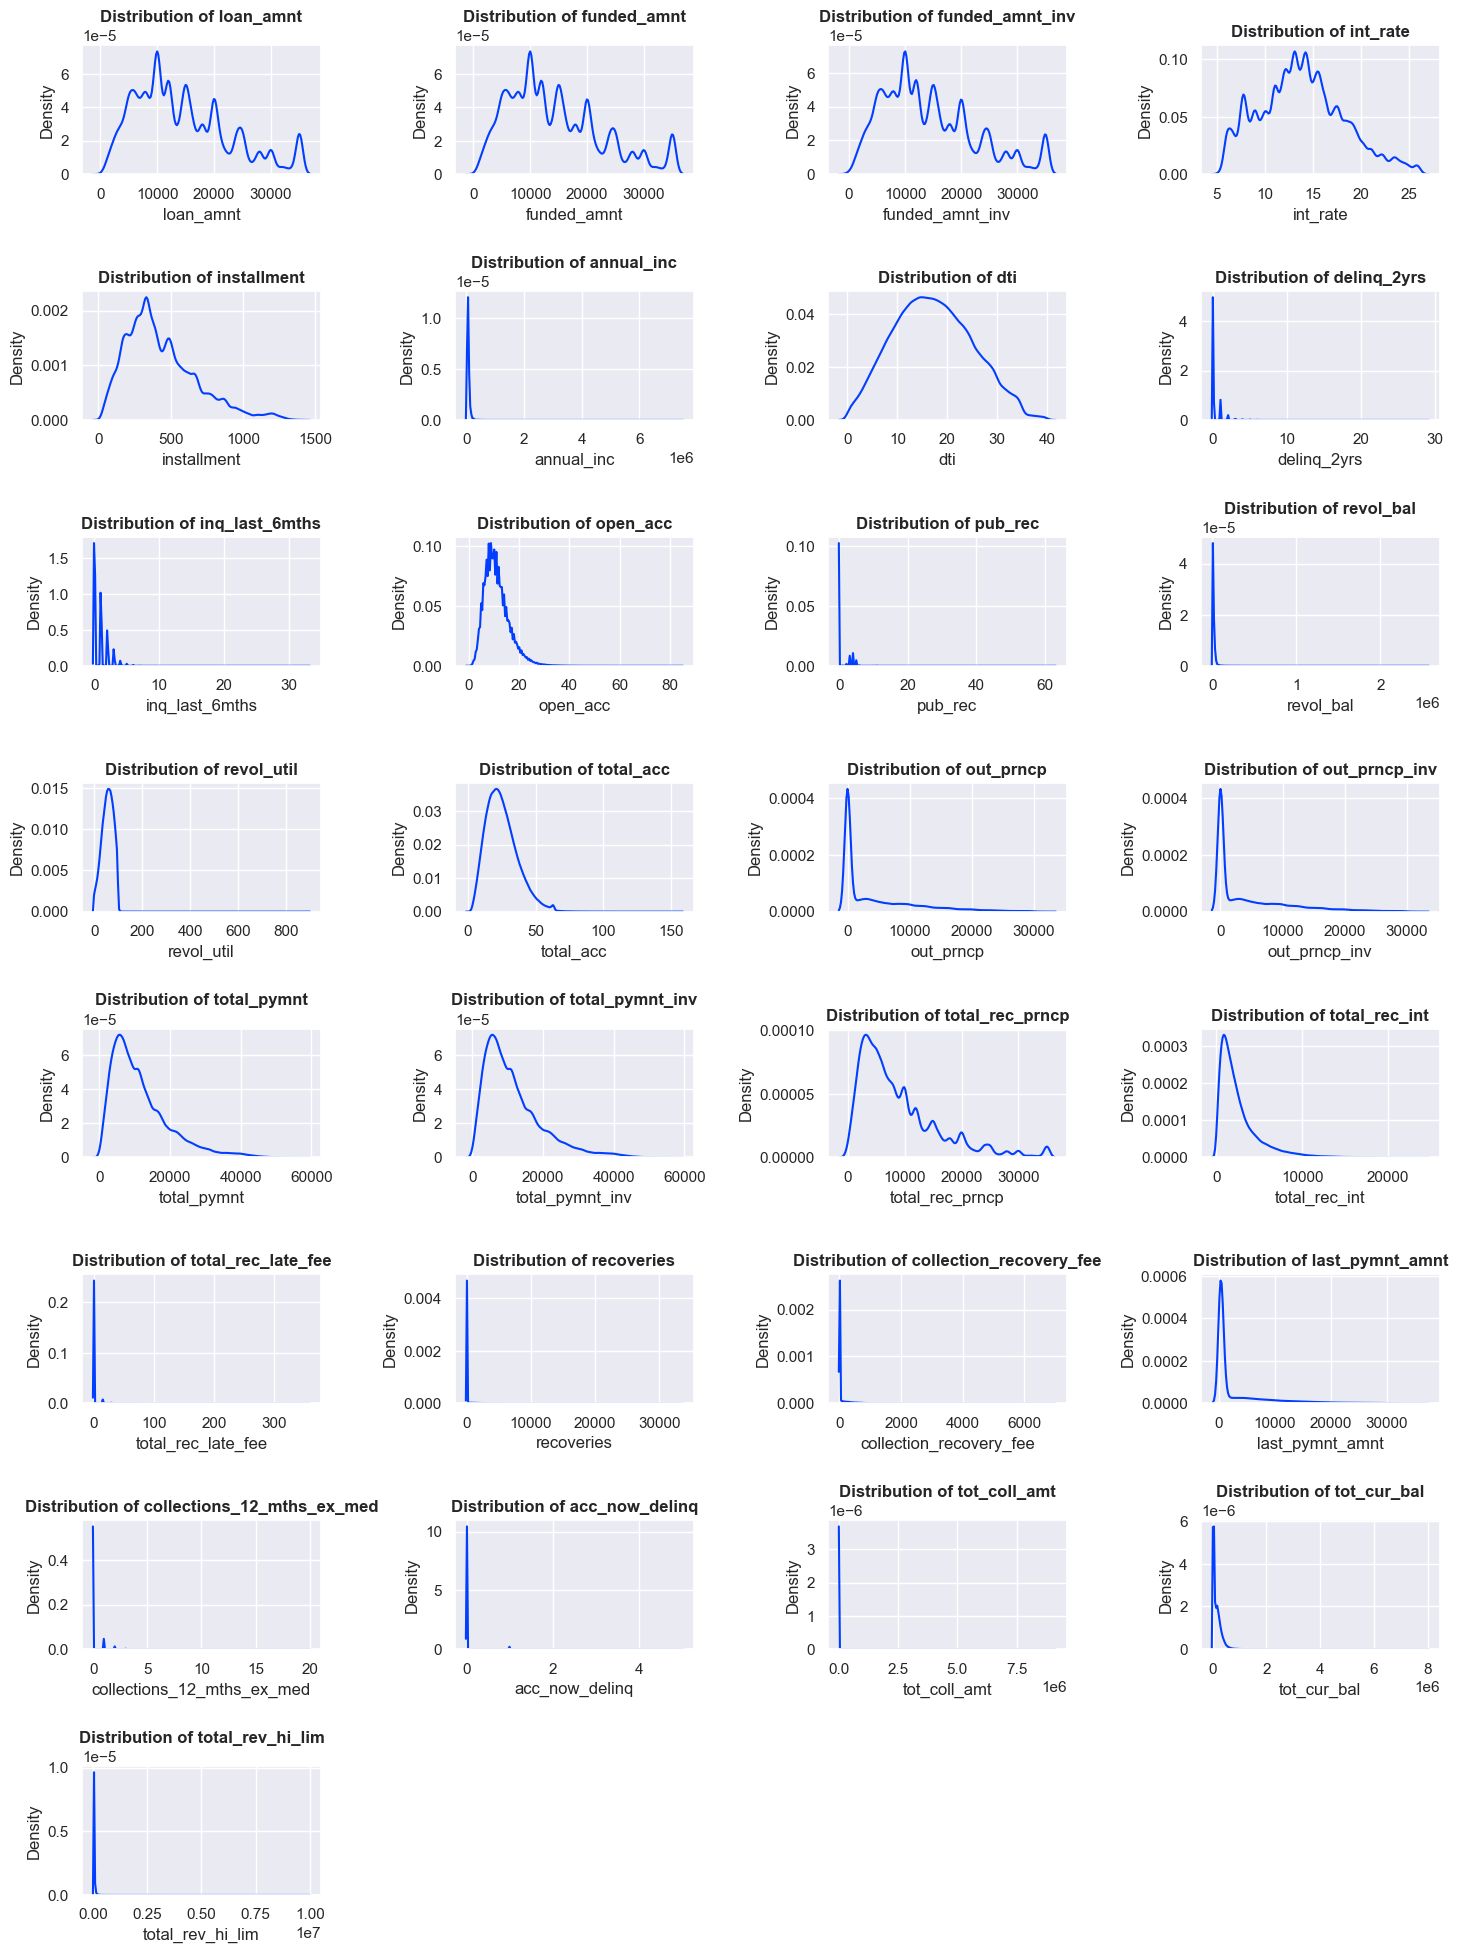

In [121]:
# kdeplot
rcParams['figure.figsize'] = 15, 20
for i in range(0, len(num_column)):
    plt.subplot(8, 4, i + 1)
    sns.kdeplot(x = datas[num_column[i]])
    plt.xlabel(num_column[i])
    plt.title('Distribution of ' + num_column[i],
              fontsize = 12,
              fontweight = 'bold')
    plt.tight_layout(pad = 2)

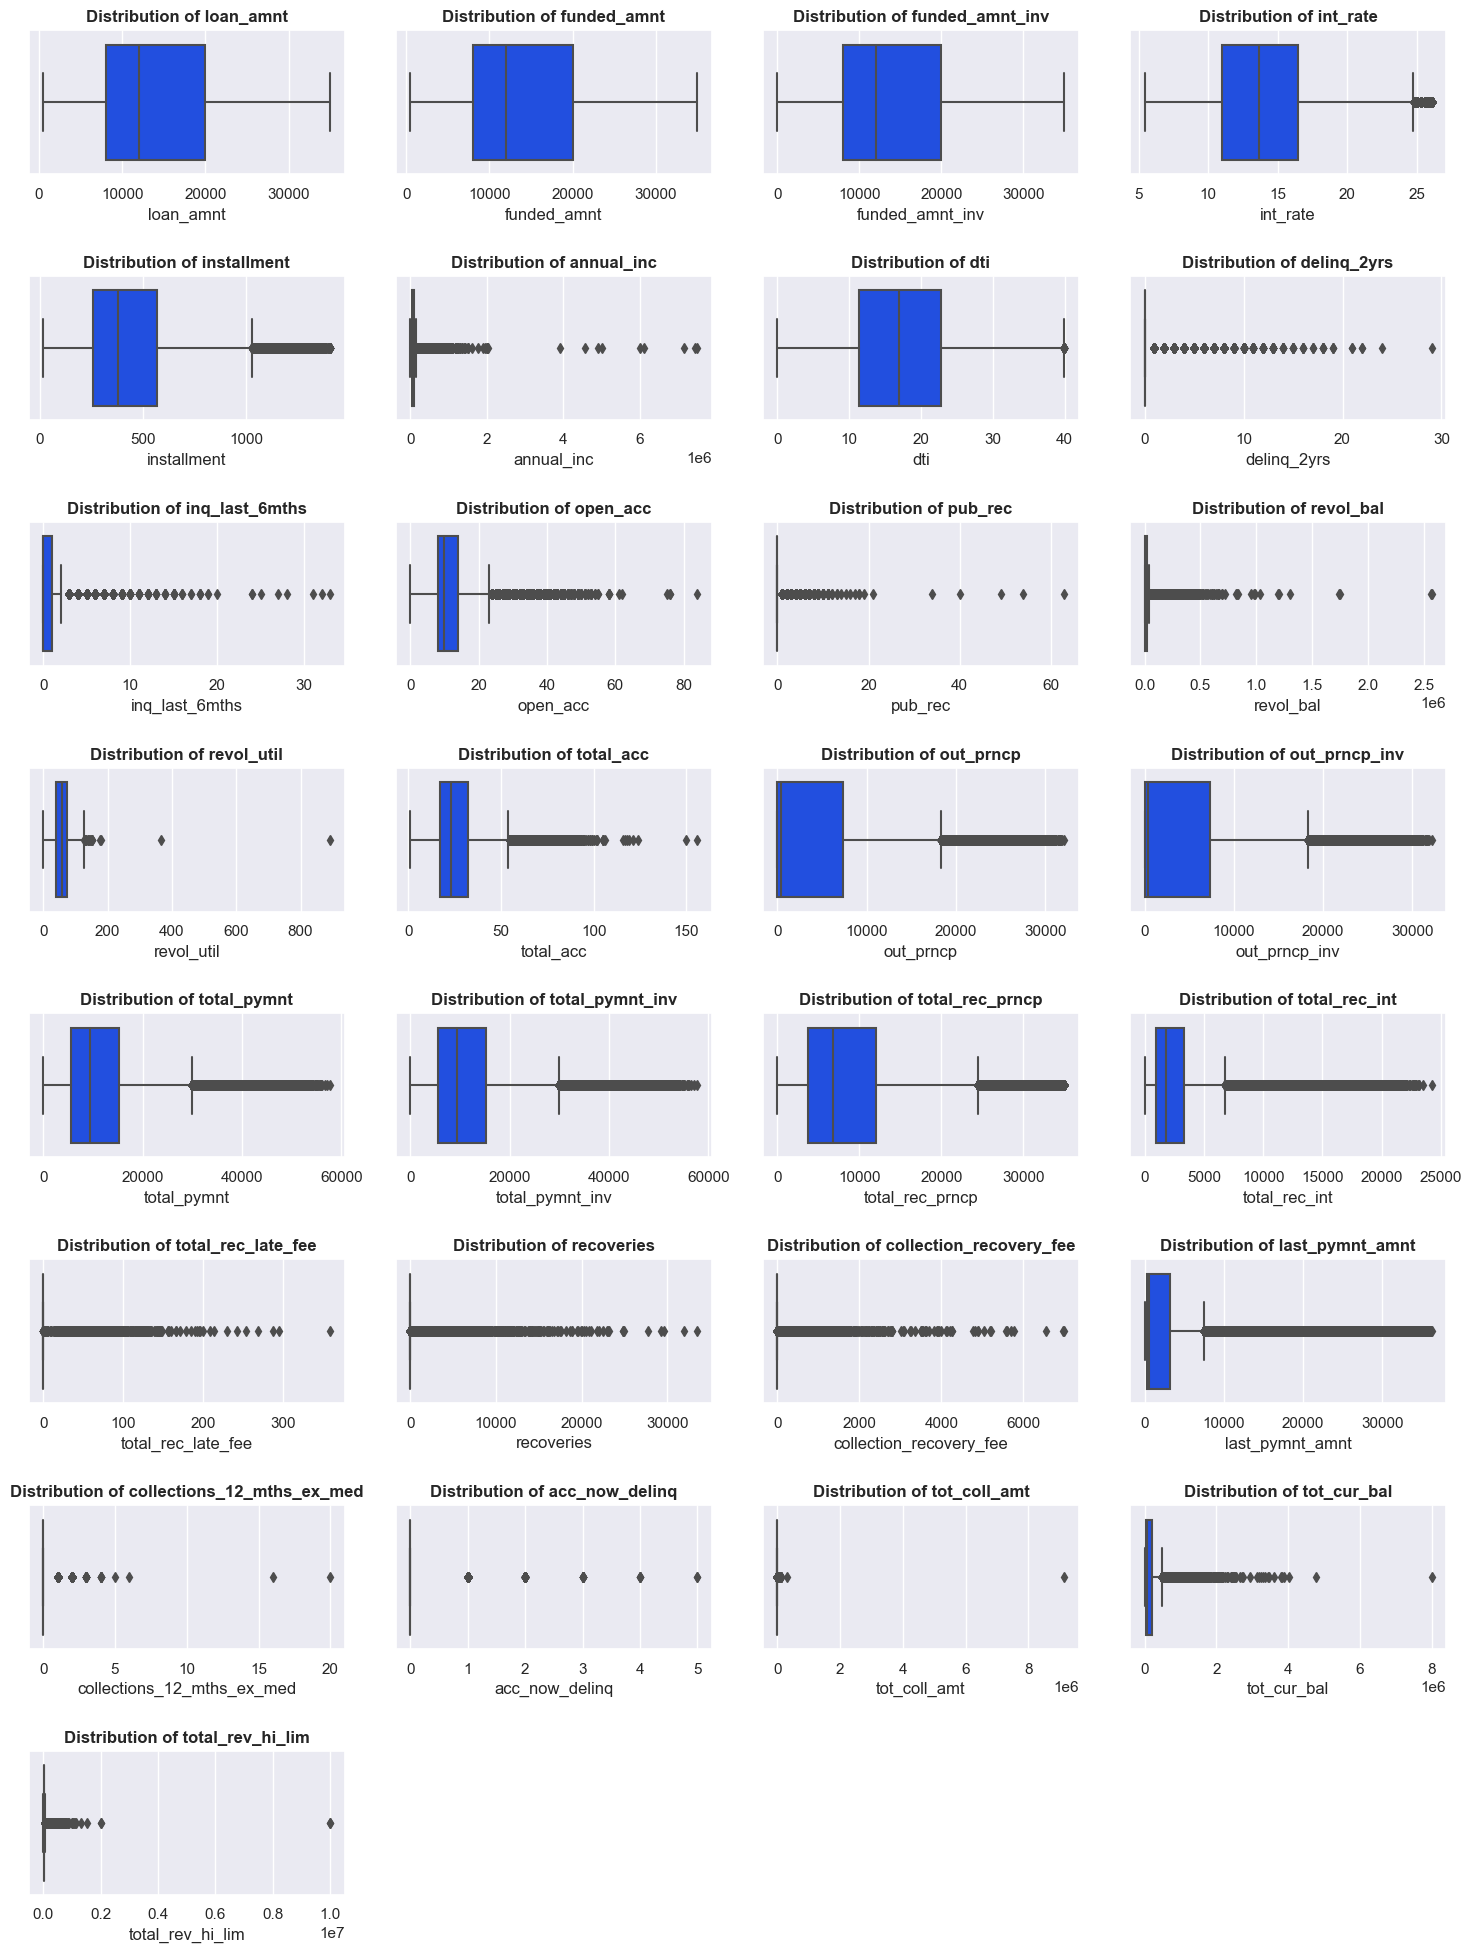

In [122]:
# boxplot
rcParams['figure.figsize'] = 15, 20
for i in range(0, len(num_column)):
    plt.subplot(8, 4, i + 1)
    sns.boxplot(x = datas[num_column[i]])
    plt.title('Distribution of ' + num_column[i],
              fontsize = 12,
              fontweight = 'bold')
    plt.tight_layout(pad = 2)

#### 1.5.2. Multivariate Analysis

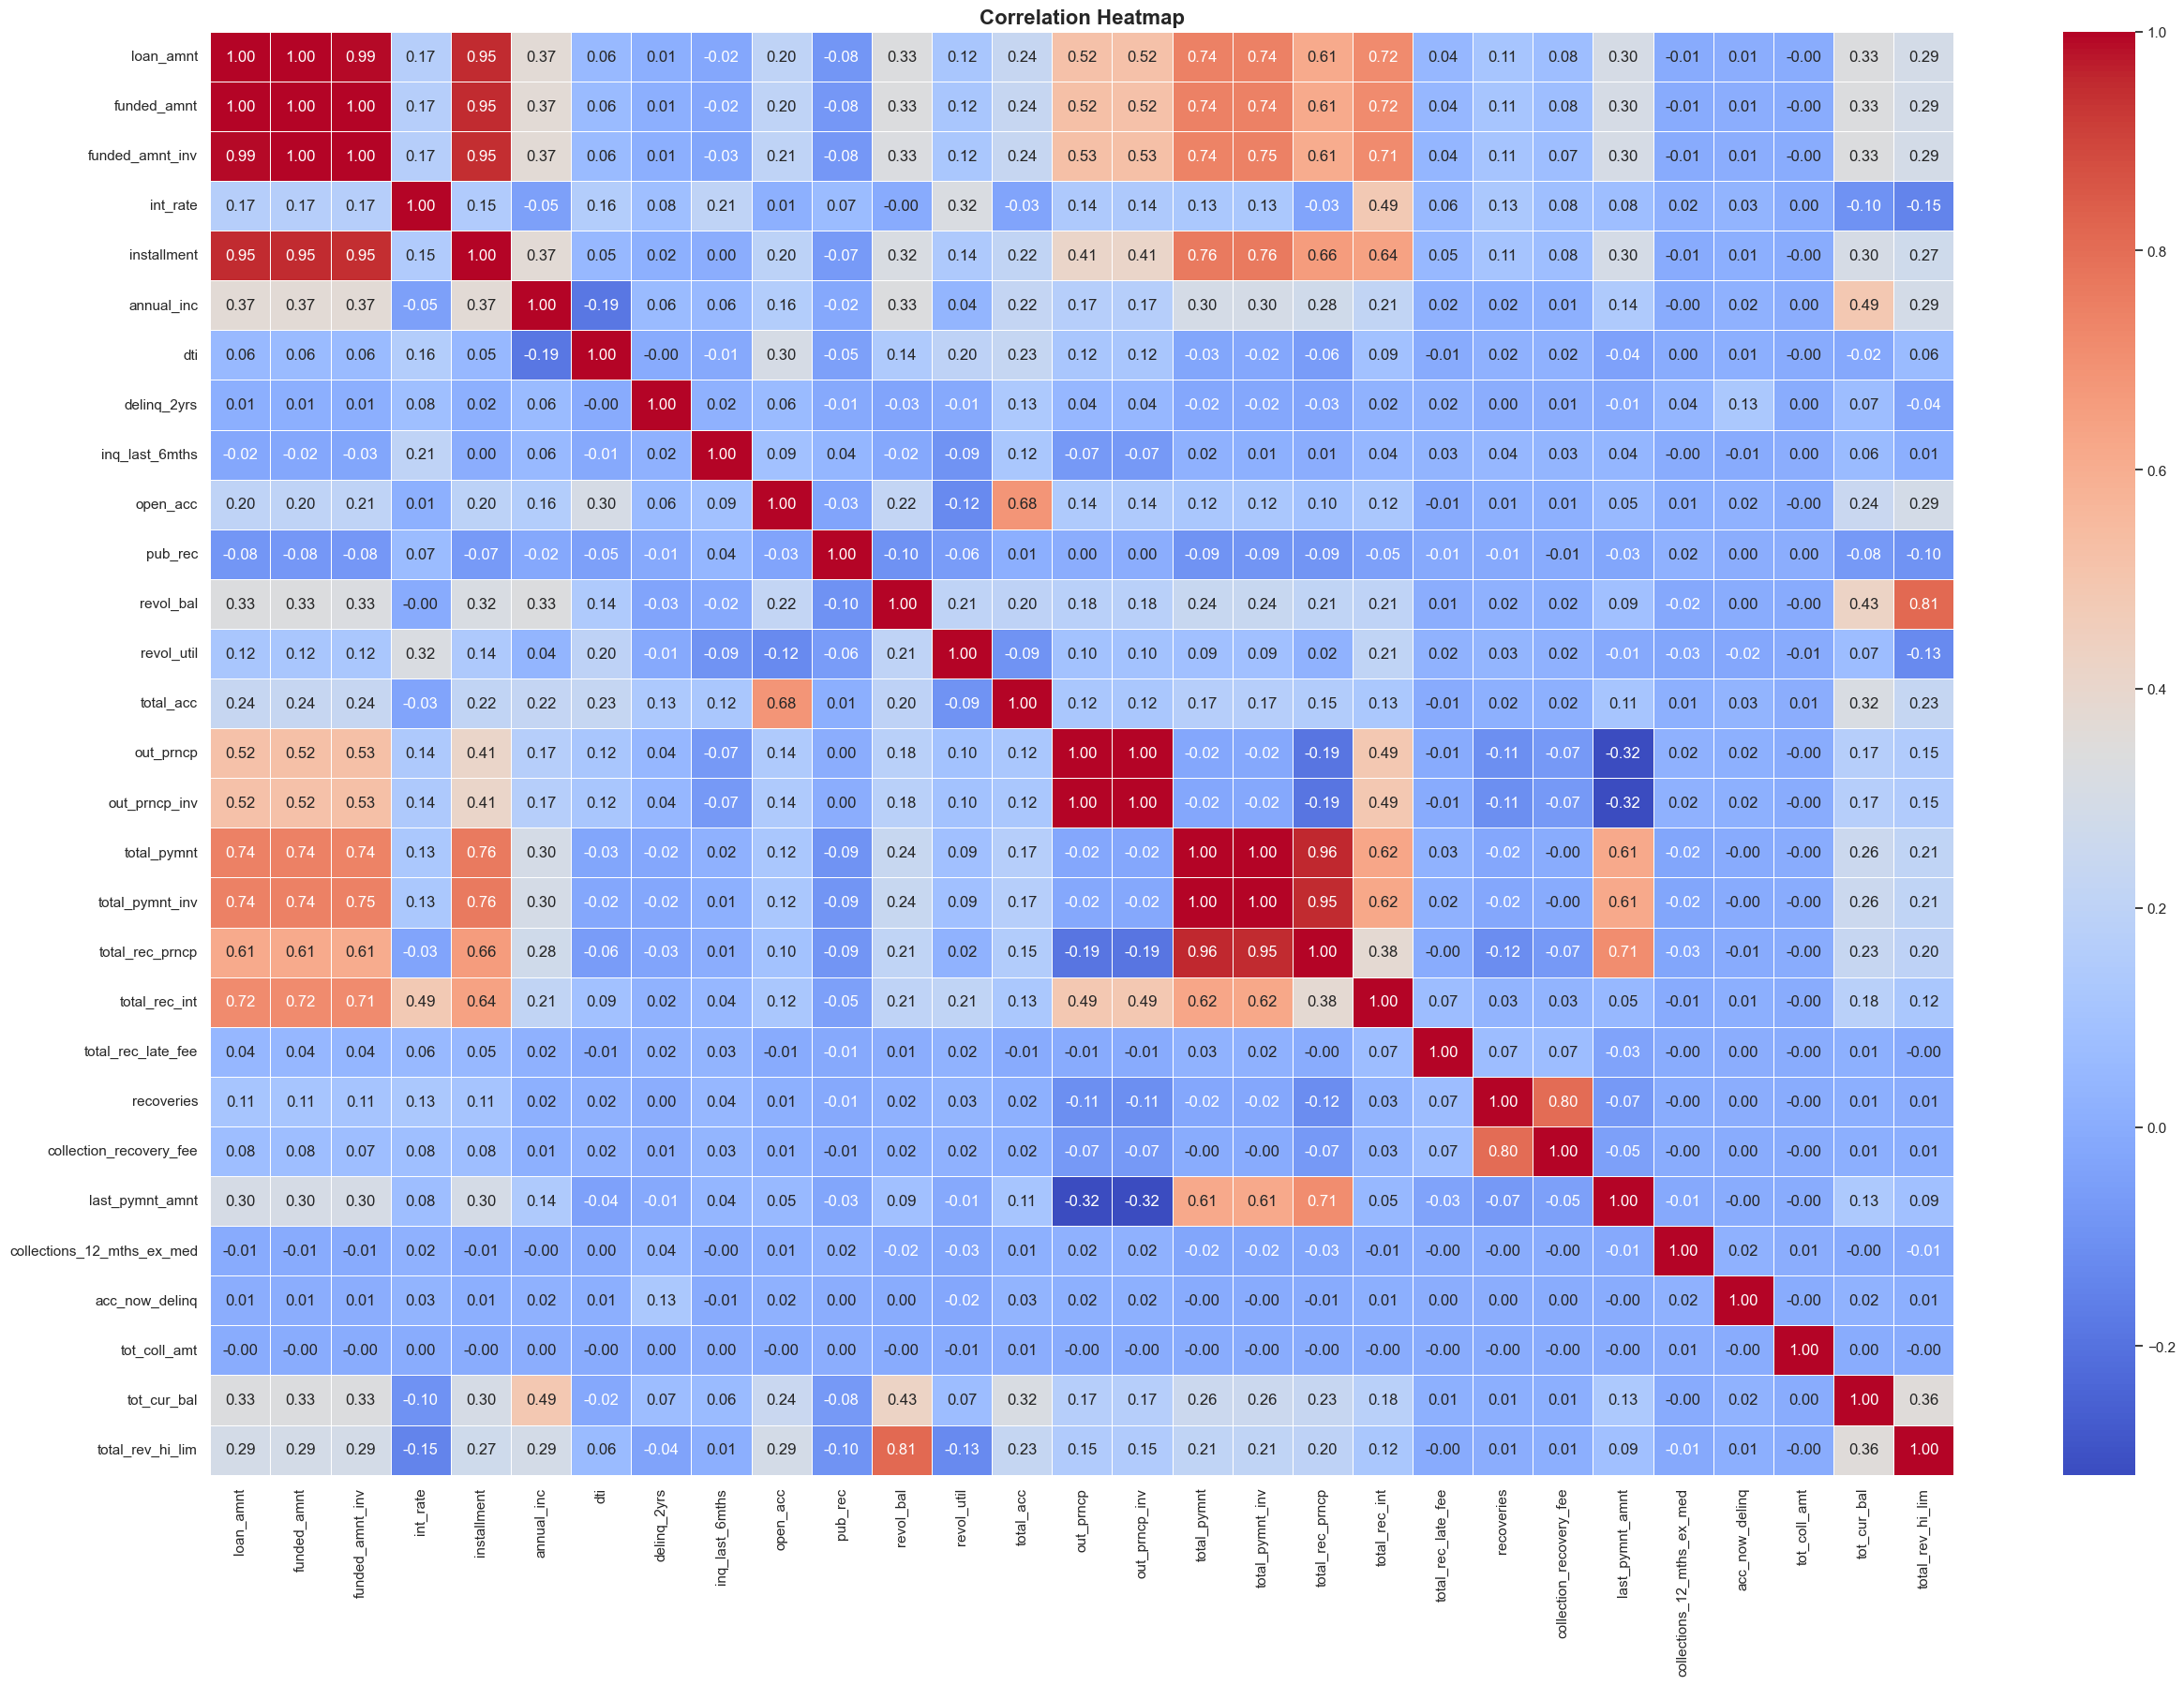

In [127]:
corr_matrix = num.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

### DATA PREPROCESSING

make a new copy from original raw dataset to ensure that no change added before preprocessing

In [4]:
data = dataku.copy() 
# make a copy from dataku to anticipate wrong steps
# making a copy is essential because we dont want to reupload since it took times

### Handle Missing Value

In [5]:
data = data.dropna(how='all', axis=1) # drop all columns without value 

In [6]:
# drop unimportant features
# unimportant features because it has too many unique : Unnamed, id, emp_title, url
# unimportant features because it has only one unique : application type, policy_code
# unimportant features because it has severe imbalance value : pymnt_plan
# unimportant features because of multicollinearity : funded_amnt, funded_amnt_inv, installment, out_prncp_inv, total_pymnt_inv, total_rec_prncp
data = data.drop(['Unnamed: 0', 'id', 'member_id', 'sub_grade', 'emp_title', 'pymnt_plan', 'url',
                  'title', 'addr_state', 'policy_code', 'application_type', 'funded_amnt', 'funded_amnt_inv',
                  'installment', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp'], axis=1)

In [7]:
# Calculate the percentage of missing values in each column
missing_percentage = data.isnull().sum() / len(data) * 100

# Create a list of columns to drop based on the threshold
columns_to_drop = missing_percentage[missing_percentage > 50].index # we drop features that has more than 50 percent missing value

# Drop the columns from the dataframe
data = data.drop(columns_to_drop, axis=1)

# we do this because we want to avoid bias caused by imputing too many missing value

In [8]:
num        = data.select_dtypes(exclude='object')
cat        = data.select_dtypes(include='object')
target     = data[['loan_status']]
num_column = num.columns
cat_column = cat.columns

#### Check Skewness

In [9]:
skewness = num.skew()
result = pd.concat([pd.DataFrame({'Column': skewness.index}), pd.DataFrame({'Skewness': skewness.values})], axis=1)
result = result.sort_values(by='Skewness', ascending=False)
print(result)

                        Column    Skewness
20                tot_coll_amt  618.273011
22            total_rev_hi_lim  100.585590
18  collections_12_mths_ex_med   31.220302
2                   annual_inc   29.568905
16     collection_recovery_fee   22.236096
19              acc_now_delinq   20.798291
8                    revol_bal   19.476291
7                      pub_rec   14.941355
14          total_rec_late_fee   13.843497
15                  recoveries   13.149942
4                  delinq_2yrs    5.345748
21                 tot_cur_bal    3.047906
17             last_pymnt_amnt    2.560644
13               total_rec_int    2.268276
5               inq_last_6mths    2.142143
11                   out_prncp    1.590189
12                 total_pymnt    1.406403
6                     open_acc    1.165698
10                   total_acc    0.813061
0                    loan_amnt    0.730980
1                     int_rate    0.334938
3                          dti    0.188283
9          

### Pipeline to do Imputation, Matching Data Type, Handle Skewness, Scaling, and Handle Outlier

In [9]:
# Define features that require mode imputation
mode_features = ['next_pymnt_d', 'emp_length', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']

# Define features that require median imputation
median_features = ['total_rev_hi_lim', 'tot_coll_amt', 'tot_cur_bal', 'revol_util', 'collections_12_mths_ex_med',
                   'acc_now_delinq', 'delinq_2yrs', 'total_acc', 'open_acc', 'inq_last_6mths', 'pub_rec', 'annual_inc']

# Perform mode imputation for mode_features
mode_imputer = SimpleImputer(strategy='most_frequent')
data[mode_features] = mode_imputer.fit_transform(data[mode_features])

# Perform median imputation for median_features
median_imputer = SimpleImputer(strategy='median')
data[median_features] = median_imputer.fit_transform(data[median_features])

# define numerical and categorical columns
num        = data.select_dtypes(exclude='object')
cat        = data.select_dtypes(include='object')
target     = data[['loan_status']]
num_column = num.columns
cat_column = cat.columns

# Define the datetime features
datetime_features = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

# Define a function to convert the string values to integer representation of the year
def convert_to_year(value):
    year = int(value[-2:])
    if year > 17:
        return 1900 + year
    else:
        return 2000 + year

# Convert the datetime columns to integer representation of the year
for feature in datetime_features:
    data[feature] = data[feature].apply(convert_to_year)

# Define features with skewed distribution
skewed_features = ['tot_coll_amt', 'total_rev_hi_lim', 'collections_12_mths_ex_med', 'annual_inc',
                    'collection_recovery_fee', 'acc_now_delinq', 'revol_bal', 'pub_rec', 'total_rec_late_fee',
                    'recoveries', 'delinq_2yrs', 'tot_cur_bal', 'last_pymnt_amnt', 'total_rec_int', 'inq_last_6mths',
                    'out_prncp', 'total_pymnt', 'open_acc', 'total_acc', 'loan_amnt', 'int_rate', 'dti', 'revol_util']
                  
# Perform skewness correction for skewed_features
for feature in skewed_features:
    skewness = num[feature].skew()
    if skewness > 0:
        data[feature] = np.log1p(data[feature])  # Apply logarithmic transformation for positively skewed features
    elif skewness < 0:
        data[feature] = 1 / (data[feature] + 1)  # Apply reciprocal transformation for negatively skewed features

# Define numerical transformer using MinMaxScaler for scaling
numerical_transformer = Pipeline([
    ('scaling', MinMaxScaler())
])

# Apply scaling to numerical columns using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, num_column)
])
data[num_column] = preprocessor.fit_transform(data[num_column])

# Calculate the quartiles and IQR for outlier detection
Q1 = data[num_column].quantile(0.25)
Q3 = data[num_column].quantile(0.75)
IQR = Q3 - Q1

# Calculate the thresholds for Winsorization
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Apply Winsorization to the numerical columns
data[num_column] = np.where(data[num_column] < lower_threshold, lower_threshold, data[num_column])
data[num_column] = np.where(data[num_column] > upper_threshold, upper_threshold, data[num_column])

### FEATURE ENCODING

#### Label Encoding for Ordinal or Boolean Features

In [10]:
# term value converted to integer represents year
data['term'] = data['term'].str.replace(' months', '').astype(int) // 12

In [11]:
# convert grade value to integer A to 1 until G to 7
data['grade'] = data['grade'].map({'B': 2, 'C': 3, 'D': 4, 'A': 1, 'E': 5, 'F': 6, 'G': 7})

In [12]:
# remove year, years, + from value
# change < 1 to 0 since it represents less than a year
# then convert the value to integer
data['emp_length'] = data['emp_length'].str.replace(r'(\+|years?|year)', '', regex=True)
data['emp_length'] = data['emp_length'].str.replace(r'< 1', '0')
data['emp_length'] = data['emp_length'].astype(int)

In [13]:
# we define loan_status value as default and non-default then do label encoding, 1 represents default and 0 represents non-default
# we do this because our objective is to create machine learning model for predicting credit risk, therefore we split loan_status into 2 categories
not_default          = ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
default              = ['Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']
data['loan_status']  = data['loan_status'].apply(lambda x: 1 if x in default else 0)

In [14]:
# this feature only has 2 unique, we can do label encoding
data['initial_list_status'] = data['initial_list_status'].replace({'f': 0, 'w': 1})

#### One Hot Encoding

In [15]:
# Perform one-hot encoding on the 'purpose' column
one_hot_encoded = pd.get_dummies(data['home_ownership'])

# Ensure unique column names
one_hot_encoded.columns = pd.Index(['home_' + str(col) for col in one_hot_encoded.columns])

# Convert values to binary (1 or 0)
one_hot_encoded = one_hot_encoded.astype(int)

# Add the one-hot encoded columns to the 'data' DataFrame
data = pd.concat([data, one_hot_encoded], axis=1)

# Remove the original 'purpose' column from the DataFrame
data.drop('home_ownership', axis=1, inplace=True)

In [16]:
# one hot encoding for verification_status because its value is neither ordinal nor boolean
encoded_data         = pd.get_dummies(data['verification_status'], prefix='', prefix_sep='').astype(int)
encoded_data.columns = ['verified', 'source_verified', 'not_verified']
data                 = pd.concat([data, encoded_data], axis=1)
data                 = data.drop('verification_status', axis=1)

In [17]:
# Extract the first digit from 'zip_code' using string slicing
data['first_digit'] = data['zip_code'].astype(str).str[0]

# Convert the extracted digits to numerical values
data['first_digit'] = pd.to_numeric(data['first_digit'])

# Perform one-hot encoding on the numerical values
one_hot_encoded = pd.get_dummies(data['first_digit'])
one_hot_encoded.columns = ['zip_code{}'.format(col) for col in one_hot_encoded.columns]
one_hot_encoded = one_hot_encoded.astype(int)

# Add the one-hot encoded columns to the 'data' DataFrame
data = pd.concat([data, one_hot_encoded], axis=1)

# Remove the original 'zip_code' and 'first_digit' columns from the DataFrame
data.drop(['zip_code', 'first_digit'], axis=1, inplace=True)

In [18]:
# Perform one-hot encoding on the 'purpose' column
one_hot_encoded = pd.get_dummies(data['purpose'])

# Ensure unique column names
one_hot_encoded.columns = pd.Index(['purpose_' + str(col) for col in one_hot_encoded.columns])

# Convert values to binary (1 or 0)
one_hot_encoded = one_hot_encoded.astype(int)

# Add the one-hot encoded columns to the 'data' DataFrame
data = pd.concat([data, one_hot_encoded], axis=1)

# Remove the original 'purpose' column from the DataFrame
data.drop('purpose', axis=1, inplace=True)


In [19]:
# Calculate missing value counts and percentages
missing_data = pd.DataFrame({'Missing Values': data.isnull().sum(), 'Missing Percentage': (data.isnull().mean() * 100)})
# Sort the DataFrame in descending order based on "Missing Values"

missing_data = missing_data.sort_values(by='Missing Values', ascending=False)
missing_data.head(5)

,Missing Values,Missing Percentage
loan_amnt,0,0.0
zip_code7,0,0.0
home_NONE,0,0.0
home_OTHER,0,0.0
home_OWN,0,0.0


In [20]:
data.sample(5)

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,issue_d,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,home_ANY,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT,verified,source_verified,not_verified,zip_code0,zip_code1,zip_code2,zip_code3,zip_code4,zip_code5,zip_code6,zip_code7,zip_code8,zip_code9,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
430547,0.411525,3,0.738288,4,10,0.284400,2014,1,0.578215,0.0,1989,0.000000,0.438007,0.0,0.499584,0.013755,0.429008,0,0.000000,0.647641,0.542882,0.0,0.0,0.0,2014,0.442709,2016,2015,0.0,0.0,0.0,0.494810,0.519620,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
228617,0.666741,5,0.707678,4,5,0.381229,2012,0,0.838710,0.0,2002,0.196562,0.609557,0.0,0.620136,0.027160,0.569528,0,0.753720,0.838705,0.817903,0.0,0.0,0.0,2015,0.509898,2016,2016,0.0,0.0,0.0,0.711474,0.622565,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
93114,0.868223,5,0.671963,3,7,0.417040,2013,0,0.903825,0.0,1994,0.196562,0.609557,0.0,0.664428,0.014897,0.642516,0,0.909645,0.868208,0.865245,0.0,0.0,0.0,2016,0.589304,2016,2016,0.0,0.0,0.0,0.757977,0.638548,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
259539,0.727450,3,0.249331,1,7,0.372821,2014,0,0.572812,0.0,1986,0.311543,0.782030,0.0,0.629093,0.041301,0.779537,1,0.832901,0.794515,0.655564,0.0,0.0,0.0,2016,0.557105,2016,2016,0.0,0.0,0.0,0.713959,0.696850,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
246961,0.568487,3,0.676478,4,8,0.451774,2014,0,0.550051,0.0,2009,0.000000,0.362270,0.0,0.576690,0.017662,0.317732,0,0.796181,0.715313,0.665278,0.0,0.0,0.0,2016,0.503683,2016,2016,0.0,0.0,0.0,0.616328,0.568253,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### FEATURE SELECTION

In [22]:
datae = data.copy()

In [23]:
datae.shape

(466285, 66)

In [24]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X = datae.drop(columns=['loan_status'])
y = datae['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

Feature: next_pymnt_d, Score: 0.44
Feature: grade, Score: 0.38
Feature: issue_d, Score: 0.30
Feature: int_rate, Score: 0.09
Feature: home_RENT, Score: 0.08
Feature: not_verified, Score: 0.06
Feature: last_credit_pull_d, Score: 0.05
Feature: dti, Score: 0.04
Feature: term, Score: 0.04
Feature: inq_last_6mths, Score: 0.04
Feature: purpose_debt_consolidation, Score: 0.03
Feature: zip_code3, Score: 0.02
Feature: purpose_small_business, Score: 0.02
Feature: zip_code1, Score: 0.01
Feature: loan_amnt, Score: 0.01
Feature: emp_length, Score: 0.01
Feature: purpose_other, Score: 0.01
Feature: open_acc, Score: 0.00
Feature: earliest_cr_line, Score: 0.00
Feature: home_OWN, Score: 0.00
Feature: zip_code4, Score: 0.00
Feature: purpose_medical, Score: 0.00
Feature: purpose_moving, Score: 0.00
Feature: purpose_educational, Score: 0.00
Feature: home_OTHER, Score: 0.00
Feature: purpose_renewable_energy, Score: 0.00
Feature: home_NONE, Score: 0.00
Feature: delinq_2yrs, Score: 0.00
Feature: collections_12

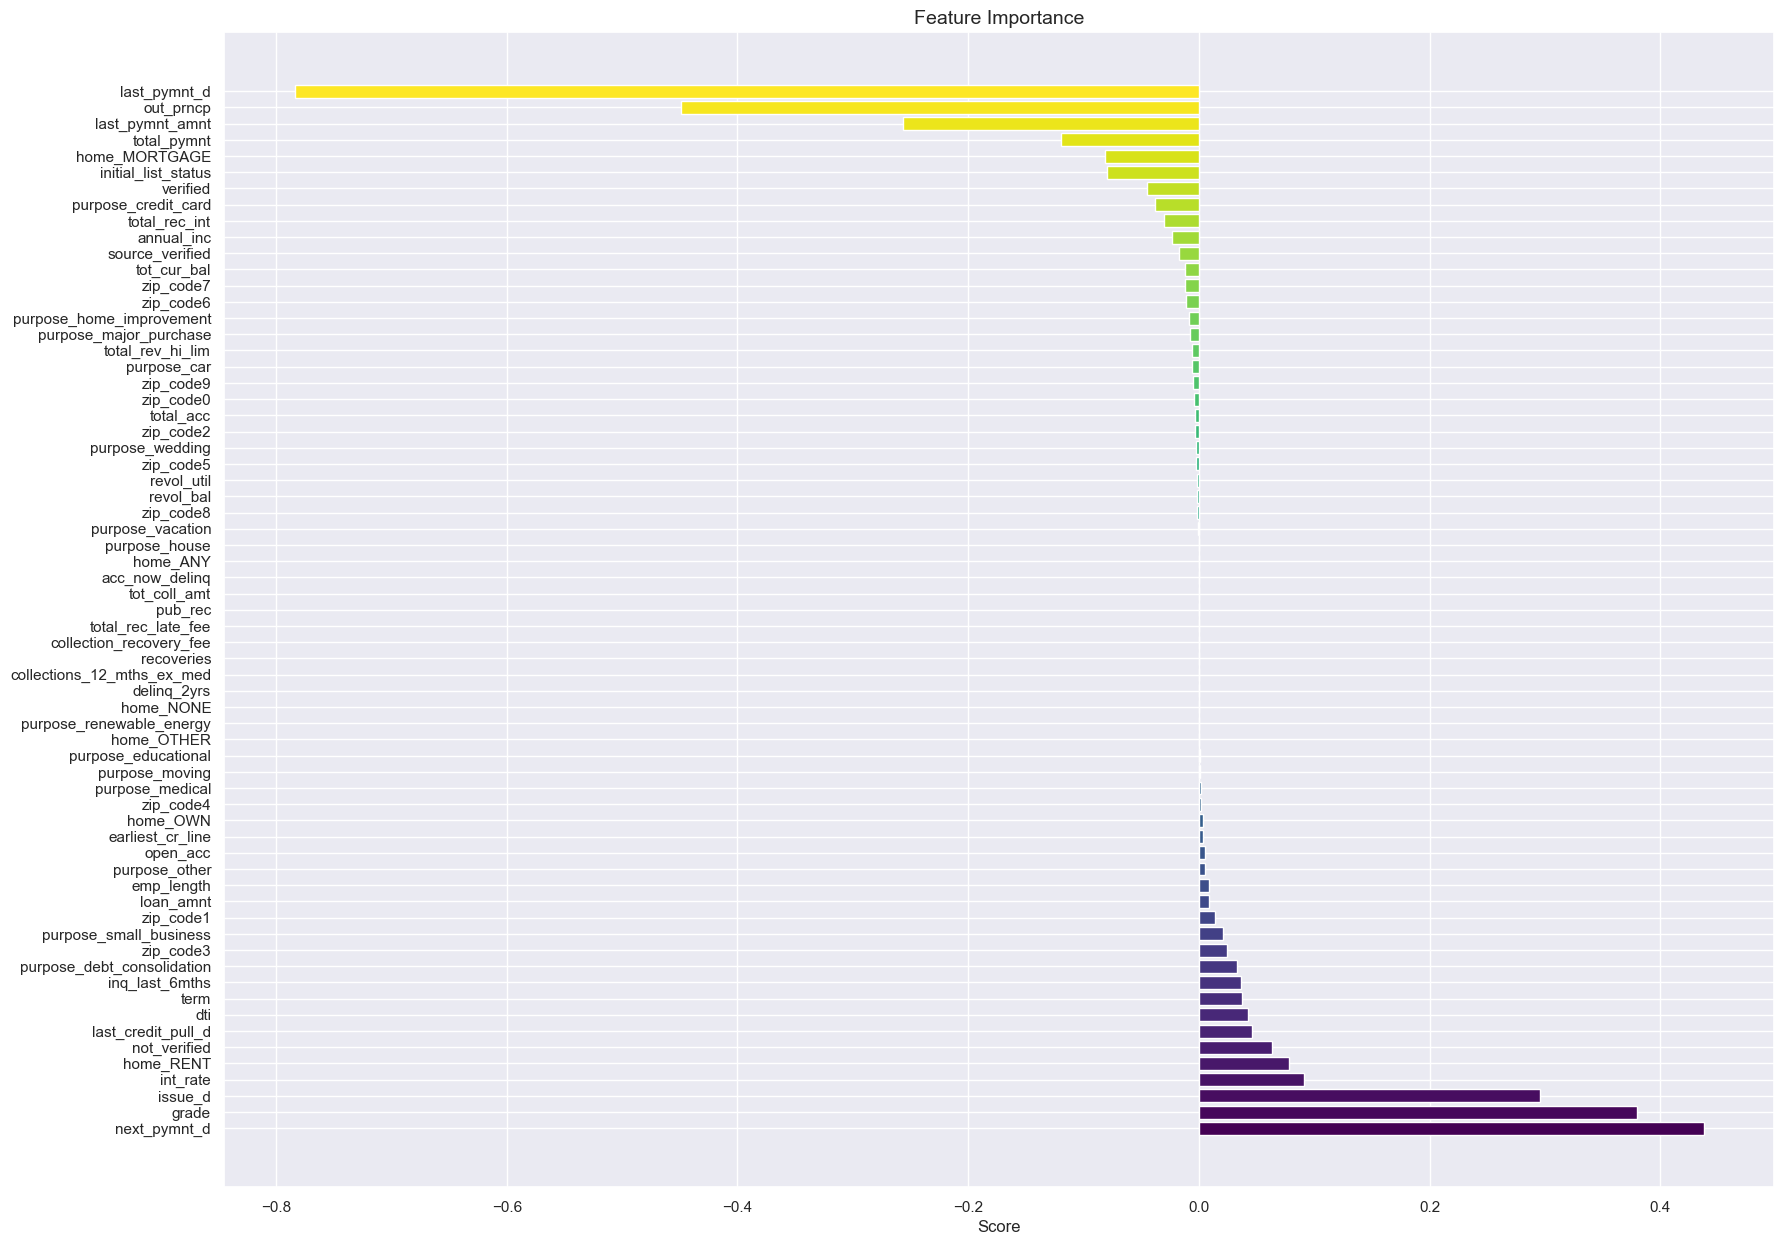

In [169]:
from sklearn.linear_model import LogisticRegression

# Define and fit the model
model = LogisticRegression()
model.fit(X, y)

# Get importance
importance = model.coef_[0]

# Sort the feature importance in descending order
sorted_indices = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_indices]
sorted_columns = X.columns[sorted_indices]

# Summarize feature importance
for i, col in enumerate(sorted_columns):
    print('Feature: %s, Score: %.2f' % (col, sorted_importance[i]))
print('')

# Plot feature importance
fig, ax = plt.subplots(figsize=(20, 15))
cmap = plt.get_cmap('viridis')
bars = ax.barh([x for x in range(len(sorted_importance))], sorted_importance, color=cmap(np.linspace(0, 1, len(sorted_importance))))
ax.set_yticks(np.arange(len(sorted_importance)))
ax.set_yticklabels(sorted_columns, ha='right')
ax.set_title('Feature Importance', fontsize=14)
ax.set_xlabel('Score')
plt.show()


#### Variance Threshold

In [170]:
from sklearn.feature_selection import VarianceThreshold

# Assuming X_train is your training feature matrix
selector = VarianceThreshold()
X_train_selected = selector.fit_transform(X_train)

# Get the indices of selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of selected features
selected_features = [X.columns[i] for i in selected_feature_indices]

# Get the scores of selected features
selected_feature_scores = selector.variances_[selected_feature_indices]

# Sort the features based on scores in descending order
sorted_indices = selected_feature_scores.argsort()[::-1]
sorted_features = [selected_features[i] for i in sorted_indices]
sorted_scores = selected_feature_scores[sorted_indices]

# Display the top 20 selected features and their scores
print("Top 20 Selected Features:")
for feature, score in zip(sorted_features[:20], sorted_scores[:20]):
    print(f"{feature} (Score: {score})")


Top 20 Selected Features:
earliest_cr_line (Score: 52.53113071109761)
emp_length (Score: 10.0)
grade (Score: 1.7409771017787234)
last_pymnt_d (Score: 1.4159582985283372)
issue_d (Score: 1.386382340832903)
last_credit_pull_d (Score: 0.9217215965590302)
term (Score: 0.7976268874802148)
home_MORTGAGE (Score: 0.2499571443135736)
purpose_debt_consolidation (Score: 0.24233011560176895)
home_RENT (Score: 0.2407302317215483)
not_verified (Score: 0.2304929057168451)
initial_list_status (Score: 0.22746315122919028)
source_verified (Score: 0.218234812872461)
verified (Score: 0.21683802667522806)
out_prncp (Score: 0.18071774570013074)
purpose_credit_card (Score: 0.17385762876572072)
zip_code9 (Score: 0.15806177740566751)
next_pymnt_d (Score: 0.1565101444946621)
zip_code3 (Score: 0.11148516256510133)
zip_code1 (Score: 0.10879435156070862)


#### Chi-Squared

In [172]:
from sklearn.feature_selection import SelectKBest, chi2

# Define dataset
k = 20

# Select K best features using chi-squared test
selector = SelectKBest(chi2, k = k)
fit = selector.fit(X, y)

# Get the selected feature indices
selected_chi = X.columns[fit.get_support(indices = True)].tolist()

# Create df
df_scores = pd.DataFrame(fit.scores_, columns = ['Score'])
df_columns = pd.DataFrame(X.columns, columns = ['Feature'])
chi = pd.concat([df_columns, df_scores], axis = 1)

# Print top k features
print(chi.nlargest(k, 'Score'))

                       Feature        Score
3                        grade  8662.776965
17                   out_prncp  8421.564077
2                     int_rate  1175.704072
62      purpose_small_business   782.956116
24             last_pymnt_amnt   740.824038
52         purpose_credit_card   589.864482
40                not_verified   566.578691
37                   home_RENT   539.406255
16         initial_list_status   531.520178
1                         term   477.314941
38                    verified   440.286679
33               home_MORTGAGE   436.713660
10              inq_last_6mths   374.932083
60               purpose_other   181.081617
18                 total_pymnt   160.727015
4                   emp_length   148.933832
53  purpose_debt_consolidation    56.642257
59              purpose_moving    49.673049
44                   zip_code3    47.293546
47                   zip_code6    39.625657


#### Mutual Information

In [25]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Set random seed
np.random.seed(40)
k = 20

# Select K best features using Mutual Information
selector = SelectKBest(mutual_info_classif, k = k)
fit = selector.fit(X, y)

# Get the selected feature indices
selected_mi_cat = X.columns[fit.get_support(indices = True)].tolist()

# Create df
df_scores = pd.DataFrame(fit.scores_, columns = ['Score'])
df_columns = pd.DataFrame(X.columns, columns = ['Feature'])
mi_cat = pd.concat([df_columns, df_scores], axis = 1)

# Print top k features
print(mi_cat.nlargest(k, 'Score'))

                       Feature     Score
25                next_pymnt_d  0.097960
26          last_credit_pull_d  0.075535
23                last_pymnt_d  0.072537
53  purpose_debt_consolidation  0.069884
33               home_MORTGAGE  0.065169
24             last_pymnt_amnt  0.062495
18                 total_pymnt  0.047044
1                         term  0.044497
37                   home_RENT  0.039950
3                        grade  0.032377
40                not_verified  0.031746
16         initial_list_status  0.031279
6                      issue_d  0.029906
17                   out_prncp  0.028335
38                    verified  0.026544
39             source_verified  0.025093
2                     int_rate  0.021950
4                   emp_length  0.020381
10              inq_last_6mths  0.015351
52         purpose_credit_card  0.013401


#### ANOVA F-Test

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

k = 20

# Select K best features using ANOVA F-test
selector = SelectKBest(f_classif, k = k)
fit = selector.fit(X, y)

# Get the selected feature indices
selected_f = X.columns[fit.get_support(indices = True)].tolist()

# X is matrix feature, y is target feature
f_scores, p_values = f_classif(X, y)

fc = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'p-value': p_values})
fc.sort_values('F-Score', ascending = False, inplace = True)

# Show top k the highest F-Score
fc.head(20)

,Feature,F-Score,p-value
18,total_pymnt,30335.561713,0.000000e+00
23,last_pymnt_d,28797.379798,0.000000e+00
24,last_pymnt_amnt,22518.651508,0.000000e+00
17,out_prncp,20719.494522,0.000000e+00
2,int_rate,14683.751268,0.000000e+00
3,grade,14430.914848,0.000000e+00
26,last_credit_pull_d,7582.382723,0.000000e+00
10,inq_last_6mths,2302.589193,0.000000e+00
5,annual_inc,2161.956968,0.000000e+00
1,term,2133.635600,0.000000e+00


#### Selected Features

from VarianceThreshold, Chi-Squared, MutualInformation, and ANOVA there are total 37 features in the top 20 then the top 20 features are selected based on their frequencies, score, their importance in various feature selection methods, also based on their relevance from business and credit loan perspective.

we choose only 20 for efficiency because of some personal limitation.

In [21]:
selected_features = ['grade', 'out_prncp', 'int_rate', 'purpose_debt_consolidation', 'last_pymnt_amnt',
                     'home_MORTGAGE', 'last_pymnt_d', 'home_RENT', 'initial_list_status', 'term',
                     'not_verified', 'verified', 'issue_d', 'total_pymnt', 'emp_length','purpose_credit_card',
                     'next_pymnt_d', 'last_credit_pull_d', 'inq_last_6mths','purpose_other']

target           = ['loan_status']

# Combine all the features
features         = selected_features + target

# Create the new DataFrame
data          = data[features].copy()

In [22]:
data.shape

(466285, 21)

In [23]:
data['loan_status'].value_counts()

loan_status
0    410953
1     55332
Name: count, dtype: int64

### MODELING

#### Undersampling

In [24]:
datas = data.copy()

In [25]:
from imblearn.under_sampling import RandomUnderSampler

X = datas.drop('loan_status', axis=1)
y = datas['loan_status']

# Assuming you have X and y as your feature and target arrays
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [26]:
# Assuming you have obtained the resampled target array y_resampled
class_counts = y_resampled.value_counts()
print(class_counts)

loan_status
0    55332
1    55332
Name: count, dtype: int64


We decide to do undersampling rather than oversampling because we have large dataset, undersampling with 110664 data is enough based on my pc's performance.

In [27]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=400)

print('Number of rows in training set:', len(X_train))
print('Number of rows in testing set:', len(X_test))

Number of rows in training set: 88531
Number of rows in testing set: 22133


### Define Function

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [34]:
def create_model(X_train, X_test, y_train, y_test, models):
    performance = []

    ensemble = VotingClassifier(estimators=[(str(i), i) for i in models], voting='hard')
    
    for model in models:
        # Hyperparameter tuning using RandomizedSearchCV
        param_dist = {}  # Define hyperparameters for tuning
        random_search = RandomizedSearchCV(model, param_dist, cv=2, n_iter=3)
        random_search.fit(X_train, y_train)
        model = random_search.best_estimator_

        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Update performance evaluation using the selected features
        train_accuracy, test_accuracy = accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)
        train_precision, test_precision = precision_score(y_train, y_pred_train, pos_label=0), precision_score(y_test, y_pred_test, pos_label=0)
        train_recall, test_recall = recall_score(y_train, y_pred_train, pos_label=0), recall_score(y_test, y_pred_test, pos_label=0)
        train_f1, test_f1 = f1_score(y_train, y_pred_train, pos_label=0), f1_score(y_test, y_pred_test, pos_label=0)
        train_f2, test_f2 = fbeta_score(y_train, y_pred_train, pos_label=0, beta=2), fbeta_score(y_test, y_pred_test, pos_label=0, beta=2)
        performance.append([train_accuracy, test_accuracy,
                            train_precision, test_precision,
                            train_recall, test_recall,
                            train_f1, test_f1,
                            train_f2, test_f2])

    # Ensemble model predictions
    ensemble.fit(X_train, y_train)
    y_pred_train_ensemble = ensemble.predict(X_train)
    y_pred_test_ensemble = ensemble.predict(X_test)

    # Update performance evaluation with ensemble predictions
    train_accuracy, test_accuracy = accuracy_score(y_train, y_pred_train_ensemble), accuracy_score(y_test, y_pred_test_ensemble)
    train_precision, test_precision = precision_score(y_train, y_pred_train_ensemble, pos_label=0), precision_score(y_test, y_pred_test_ensemble, pos_label=0)
    train_recall, test_recall = recall_score(y_train, y_pred_train_ensemble, pos_label=0), recall_score(y_test, y_pred_test_ensemble, pos_label=0)
    train_f1, test_f1 = f1_score(y_train, y_pred_train_ensemble, pos_label=0), f1_score(y_test, y_pred_test_ensemble, pos_label=0)
    train_f2, test_f2 = fbeta_score(y_train, y_pred_train_ensemble, pos_label=0, beta=2), fbeta_score(y_test, y_pred_test_ensemble, pos_label=0, beta=2)
    performance.append([train_accuracy, test_accuracy,
                        train_precision, test_precision,
                        train_recall, test_recall,
                        train_f1, test_f1,
                        train_f2, test_f2])

    performance_df = pd.DataFrame(data=performance,
                                  columns='Train\nAccuracy, Test\nAccuracy, Train\nPrecision, Test\nPrecision, Train\nRecall, Test\nRecall, Train\nF1 Score, Test\nF1 Score, Train\nF2 Score, Test\nF2 Score'.split(','),
                                  index=[str(model).split('(')[0] for model in models] + ['Ensemble'])

    plt.figure(figsize=(12, 9))
    sns.heatmap(performance_df, cmap='mako', annot=True, annot_kws={'fontsize': 10})
    plt.tick_params(axis='both',
                    which='major',
                    labelsize=10,
                    labelbottom=False, bottom=False,
                    labeltop=True, top=False)
    plt.tight_layout()
    plt.savefig('modelling.png')
    plt.show()

# Define c_matrix_plot() function
def c_matrix_plot(y_test, y_pred):

    c_matrix = confusion_matrix(y_test, y_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    ax = sns.heatmap(c_matrix, annot = labels, fmt = '', cmap = 'mako')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['non-default loan', 'default loan'])
    ax.yaxis.set_ticklabels(['non-default loan', 'default loan'])
    plt.show()


# Define plot_learning_curve() function
def plot_learning_curve(model, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid(True)
    plt.fill_between(
        train_sizes, train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std, alpha=0.1, color='r'
    )
    plt.fill_between(
        train_sizes, test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std, alpha=0.1, color='g'
    )
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

### Performance Heatmap

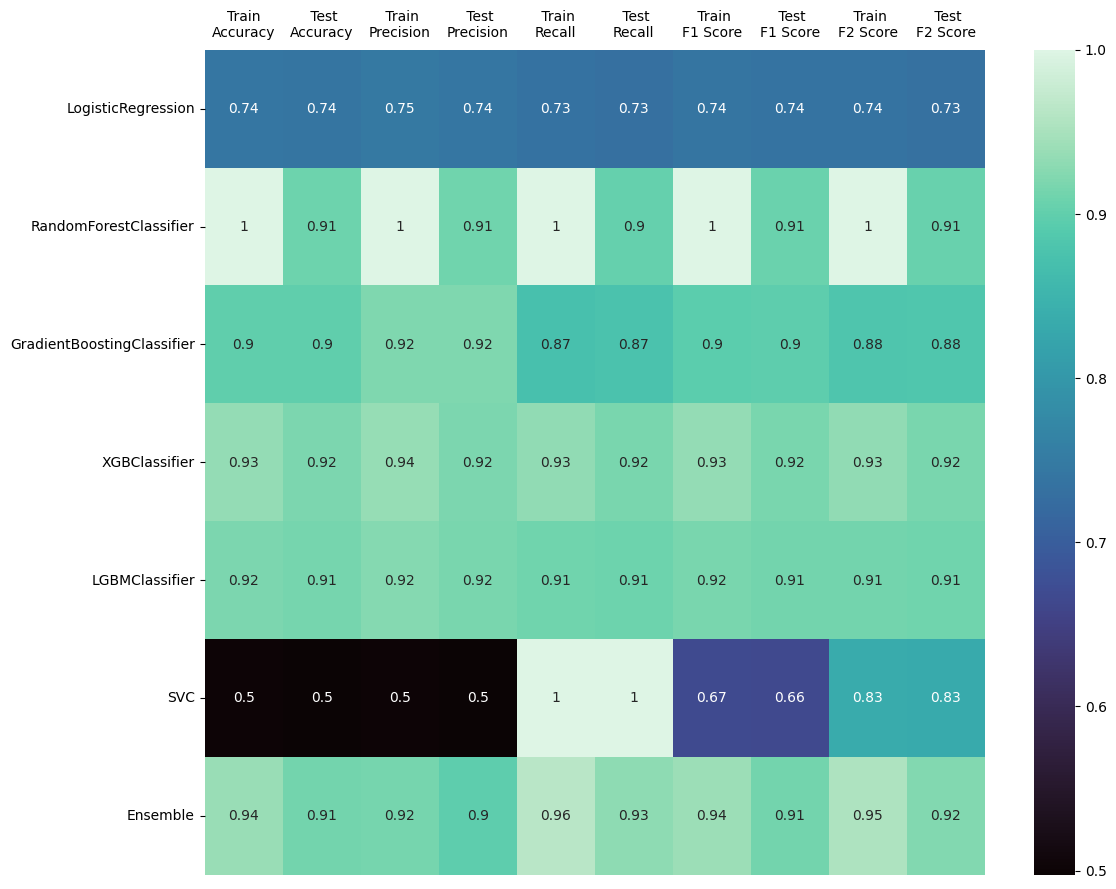

In [63]:
# Define Classification Algorithms
models = [LogisticRegression(random_state=400),
          RandomForestClassifier(random_state=400),
          GradientBoostingClassifier(random_state=400),
          XGBClassifier(random_state=400),
          LGBMClassifier(random_state=400)]

# Create model
create_model(X_train, X_test, y_train, y_test, models)

we will then compare ensemble and the best based on performance heatmap, which is RandomForest.

#### Ensemble VotingClassifier

In [30]:
# Define Classification Algorithms
models = [LogisticRegression(random_state=400),
          RandomForestClassifier(random_state=400),
          GradientBoostingClassifier(random_state=400),
          XGBClassifier(random_state=400),
          LGBMClassifier(random_state=400)]

# Create ensemble model
ensemble = VotingClassifier(estimators=[(str(i), i) for i in models], voting='hard')
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('LogisticRegression(random_state=400)',
                              LogisticRegression(random_state=400)),
                             ('RandomForestClassifier(random_state=400)',
                              RandomForestClassifier(random_state=400)),
                             ('GradientBoostingClassifier(random_state=400)',
                              GradientBoostingClassifier(random_state=400)),
                             ('XGBClassifier(base_score=None, booster=None, '
                              'callbacks=None,\...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=400, ...)),
                             ('LGBMClassifier(random_state=400)',
                              LGBMClassifier(random_state=400))])

Confusion Matrix

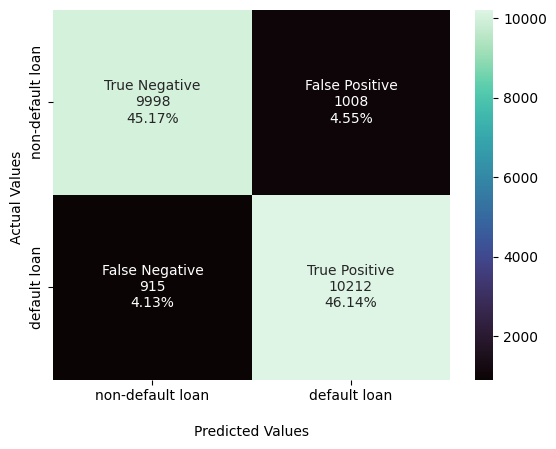

In [37]:
# Predict using the ensemble model
ensemble_predictions = ensemble.predict(X_test)

# Compute and plot the confusion matrix
c_matrix_plot(y_test, ensemble_predictions)

Validation Score

In [47]:
# Define the VotingClassifier
ensemble = VotingClassifier(estimators=[(str(i), i) for i in models], voting='hard')

# Perform cross-validation
cv_scores = cross_val_score(ensemble, X_train, y_train, cv=3, scoring='accuracy')

print("Validation Score:", cv_scores)
print('Mean Accuracy:', cv_scores.mean())
print('Standard Deviation:', cv_scores.std())

Validation Score: [0.90749212 0.9082345  0.90918333]
Mean Accuracy: 0.9083033153493553
Standard Deviation: 0.0006921447429916371


### RandomForestCLassifier

Confusion Matrix

In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42
)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 ... 0 1 0]


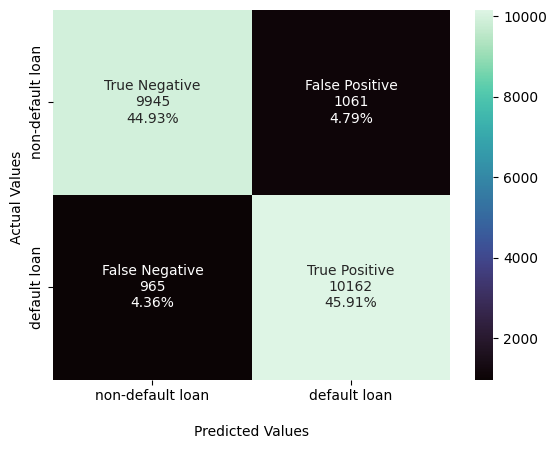

In [41]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=400)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Generate confusion matrix for Random Forest Classifier
c_matrix_plot(y_test, rf_predictions)

Cross Validation Score

In [45]:
# Create a RandomForest Classifier
model = RandomForestClassifier()

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # Change cv and scoring as needed

# Print the cross-validation scores
print('Cross-Validation Scores:', scores)
print('Mean Accuracy:', scores.mean())
print('Standard Deviation:', scores.std())

Cross-Validation Scores: [0.85779084 0.95128516 0.8512176  0.94152718 0.95599258]
Mean Accuracy: 0.9115626708986995
Standard Deviation: 0.04686726340364574


According to result from Cross Validation Score, we decide to use RandomForest as our model. our reason is because it has the highest mean accuracy and the lowest standar deviation. Mean accuracy provides an overall measure of how well the model performs on average. A higher mean accuracy indicates better predictive performance of the model. while standar deviation gives an idea of how consistent the model's performance is across different folds or runs. A lower standard deviation suggests that the model's performance is more stable and reliable. Although other metrics other than mean accuracy and std seem obvious, mean accuracy and std are more comprehensive to evaluate model performance.

### MODEL EVALUATION

Hyperparameter Tuning

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Create a Random Forest Classifier
model = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': randint(100, 200),  # Randomly sample between 100 and 200
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a RandomizedSearchCV object with the model and parameter grid
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=2, n_iter=4, n_jobs=-1)

# Perform randomized search on the data
random_search.fit(X, y)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Print the best score found
print("Best Score:", random_search.best_score_)

Best Parameters: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 159}
Best Score: 0.7359343435876748


we gain best score at 0.7359343435876748, it can be considered as good result.

Train Model

In [49]:
# Create a new instance of the Random Forest classifier with the best hyperparameters
best_max_depth = 3
best_max_features = 'log2'
best_min_samples_leaf = 1
best_min_samples_split = 5
best_n_estimators = 159

model = RandomForestClassifier(
    max_depth=best_max_depth,
    max_features=best_max_features,
    min_samples_leaf=best_min_samples_leaf,
    min_samples_split=best_min_samples_split,
    n_estimators=best_n_estimators
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8687480233136041


then after training the model we get improvement on accuracy score

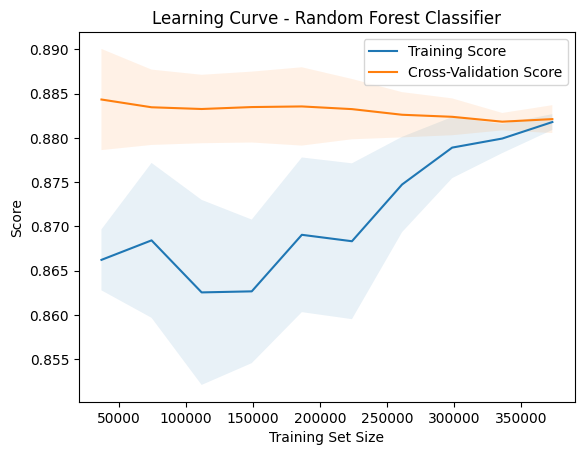

In [50]:
# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of the training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the test scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - Random Forest Classifier')
plt.legend()
plt.show()

The result above indicates that the model accurately predicted the credit risk category for approximately 92.98%

Feature Importance

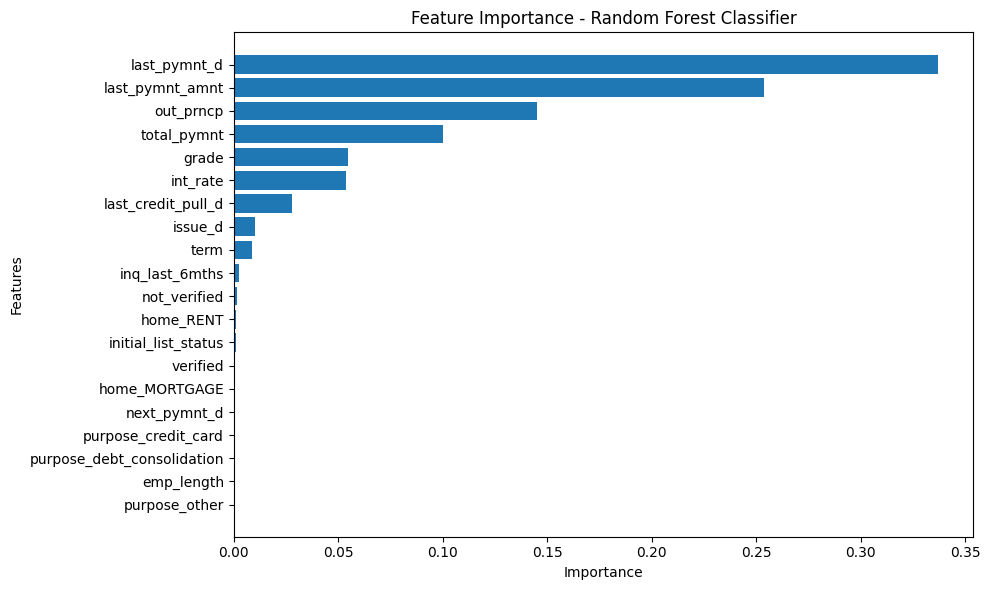

In [55]:
# Train the Random Forest classifier with the best hyperparameters
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the names of the features
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices][::-1])
plt.yticks(range(len(feature_importances)), feature_names[sorted_indices][::-1])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest Classifier')
plt.tight_layout()
plt.show()

### Interpretation

1.	last_pymnt_d: 

    The date of the most recent payment made by the borrower. This feature could be important because borrowers who have made recent payments are less likely to default.
2.	Last_pymnt_amnt: 

    The amount of the most recent payment made by the borrower. This feature is likely important because larger payment amounts may indicate better financial stability and a lower risk of default.
3.	out_prncp:

    The outstanding principal amount of the loan. This feature is important as borrowers with higher outstanding principal amounts may have a higher risk of default.
4.	total_pymnt:

    The total payment amount received from the borrower. This feature reflects the borrower's repayment behavior and their ability to meet their payment obligations.
5.	int_rate: 

    The interest rate charged on the loan. This feature is significant as higher interest rates may increase the borrower's financial burden and raise the likelihood of default.
6.	last_credit_pull_d: 

    The date when the lender last pulled the borrower's credit information. This feature could be important as lenders need up-to-date credit information to assess the borrower's creditworthiness accurately.
7.	grade:

    The loan grade assigned to the borrower based on their creditworthiness. This feature is likely important as it represents the lender's assessment of the borrower's risk profile.
8.	term: 

    The duration of the loan. This feature could be relevant as longer-term loans may carry higher risks of default.
9.	inq_last_6mths:

    The number of credit inquiries made by the borrower in the last six months. This feature may be indicative of the borrower's recent credit activity and potential financial instability.
10.	not_verified:

    This feature likely represents whether the borrower's income or employment information has been verified. Borrowers who are not verified may have a higher risk of default.

###  Business Recommendation

1.	last_pymnt_d:

    Analyze the patterns and trends in the last payment dates. Identify any seasonal or cyclical patterns that could help optimize payment reminders or collection strategies.
2.	last_pymnt_amnt:

    Explore ways to incentivize borrowers to make larger payments or pay off their loans faster. This could involve providing discounts, rewards, or personalized offers based on payment behavior.
3.	out_prncp: 

    Develop strategies to minimize the outstanding principal amount. This could include targeted campaigns to encourage borrowers to make additional payments or refinance their loans to reduce the principal faster.
4.	total_pymnt: 
    
    Use the total payment amount as a measure of customer satisfaction. Monitor and improve customer experience to ensure borrowers feel they are getting value for their payments.
5.	int_rate: 

    Analyze interest rates and compare them to industry standards and competitors. Consider adjusting interest rates to stay competitive or attract borrowers with more favorable rates.
6.	last_credit_pull_d: 

    Monitor and update credit information regularly to ensure accurate and up-to-date credit assessments. Provide borrowers with access to their credit information and educational resources to improve their credit scores.
7.	grade: 

    Use the loan grade as an indicator of credit risk. Develop tailored strategies for different loan grades to manage risk effectively and optimize loan portfolio performance.
8.	term: 

    Consider offering flexible loan terms to cater to different borrower preferences. Explore options for shorter or longer loan terms based on customer demand and market trends.
9.	inq_last_6mths: 

    Analyze the impact of recent credit inquiries on loan performance and default rates. Use this information to refine credit assessment models and identify potential red flags.
10.	not_verified: 

    Evaluate the impact of verification status on loan performance and default rates. Consider implementing stricter verification processes or providing additional incentives for verified borrowers.


# ALHAMDULILLAH